<a href="https://colab.research.google.com/github/bemunozm/BAHPRO/blob/main/Skip_List.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Skip Lists**

Las Skip Lists surgieron como una respuesta ingeniosa a la complejidad inherente de los árboles de búsqueda balanceados. Concebidas por el Dr. William Pugh en 1989, las Skip Lists ofrecen un rendimiento comparable a las estructuras de datos balanceadas pero con una mayor facilidad de implementación y comprensión. Este algoritmo aprovecha las probabilidades para simplificar el balanceo de la estructura, manteniendo la eficiencia en operaciones clave como la inserción, búsqueda y eliminación.

# Sección 1: Paradigma Divide and Conquer

1. Introducción al Paradigma Divide and Conquer:

El paradigma Divide and Conquer, un enfoque fundamental en el diseño de algoritmos, aborda problemas complejos dividiéndolos en subproblemas más simples. Este paradigma se basa en la descomposición recursiva y en la combinación eficiente de soluciones parciales. Las Skip Lists, aunque construidas con una perspectiva probabilística, incorporan principios de este paradigma al organizar y acceder a los datos de manera que se pueda "dividir" el conjunto total y "conquistar" cada sección de forma óptima.

2. Las Skip Lists y el Paradigma Divide and Conquer:

A primera vista, las Skip Lists emplean un paradigma probabilístico en su construcción, donde cada nodo decide aleatoriamente su altura en la lista. Sin embargo, al observar la mecánica de búsqueda, es evidente que las Skip Lists adoptan un enfoque Divide and Conquer. La lista está dividida en niveles, con cada nivel funcionando como un filtro que reduce progresivamente el conjunto de búsqueda. Al iniciar en el nivel superior y descender estratégicamente, el algoritmo divide la búsqueda en etapas manejables, conquistando rápidamente el conjunto de datos al evitar el recorrido secuencial completo. Esta técnica permite que las operaciones de búsqueda se ejecuten en un tiempo logarítmico esperado, evidenciando una aplicación innovadora del paradigma Divide and Conquer en una estructura de datos lineal.

3. Relación entre las Skip Lists y el Paradigma:

La relación de las Skip Lists con el paradigma Divide and Conquer se manifiesta claramente durante las operaciones de búsqueda. Aunque cada nodo decide por azar cuántos niveles tendrá, una vez que la Skip List está construida, la forma en que buscamos en ella sigue un enfoque metódico. Al enfrentarnos a la tarea de localizar un elemento, no examinamos cada nodo individualmente. En cambio, iniciamos la búsqueda en los niveles más altos, donde cada nodo nos permite saltar sobre grandes bloques de la lista en un solo movimiento.

Imagina que estás en una biblioteca con varios pisos y buscas un libro específico. En lugar de comenzar en el primer piso y revisar cada estante uno por uno, primero miras una guía que te dice en qué piso se encuentra el libro. Luego, vas directamente a ese piso y comienzas a buscar en los estantes específicos. En este ejemplo, cada piso representa un nivel de la Skip List, y la guía es como los enlaces entre los nodos que te ayudan a "dividir" la biblioteca en secciones más pequeñas y manejables. Este es el corazón del paradigma Divide and Conquer: dividir el espacio de búsqueda en segmentos más pequeños para "conquistar" el problema de manera más eficiente.

Por lo tanto, mientras que la construcción de la Skip List puede ser aleatoria, el proceso de búsqueda es deliberado y calculado, aprovechando la estructura de niveles para minimizar los pasos necesarios para encontrar el elemento deseado. Esta combinación de construcción aleatoria y búsqueda estratégica es lo que hace que las Skip Lists sean tan fascinantes y efectivas.

# Sección 2: Explicación del Algoritmo

Las Skip Lists son una estructura de datos que permite búsquedas rápidas dentro de una secuencia ordenada de elementos. Para entender cómo funcionan, es esencial desglosar sus componentes y el proceso de búsqueda, inserción y eliminación de elementos.

##Estructura Básica:

**Nodos**: Cada elemento de una Skip List es representado por un nodo. Cada nodo tiene uno o más punteros (enlaces) que conectan con otros nodos.

**Niveles**: Una Skip List está compuesta por varios niveles de listas enlazadas. El nivel más bajo (nivel 0) contiene todos los nodos, y cada nivel superior actúa como una "vía rápida" para saltar a través de la lista, conteniendo solo algunos de los nodos del nivel inferior.

**Cabeza** (Head): Todos los niveles tienen un nodo inicial llamado "head", que sirve como punto de entrada para las operaciones de la Skip List.
Búsqueda:

##Explicacion del Codigo

###Definición de la Clase Node
La clase Node representa los elementos individuales dentro de la Skip List. Cada nodo contiene una clave y un arreglo de punteros hacia adelante (forward). El tamaño del arreglo está determinado por el nivel (level) del nodo, que indica hasta qué punto puede "saltar" en la lista. Aquí está el código y su respectiva explicación:

In [ ]:
# Definición de la clase Node
class Node:
    # Constructor de la clase, inicializa el nodo con una clave y un nivel
    def __init__(self, key, level):
        self.key = key  # Valor almacenado en el nodo
        self.forward = [None] * (level + 1)  # Lista de enlaces hacia adelante, con None como valor inicial


###Definición de la Clase SkipList
La clase SkipList define la estructura de la lista con saltos, incluyendo los métodos para su manipulación:

In [ ]:
class SkipList:
    # Constructor de la clase, establece el nivel máximo y la probabilidad 'p' para la generación de niveles aleatorios
    def __init__(self, max_lvl, p):
        self.MAX_LVL = max_lvl  # Nivel máximo de la lista
        self.p = p  # Probabilidad utilizada para determinar la altura aleatoria de los nodos
        self.header = self.create_node(self.MAX_LVL, -1)  # Nodo cabecera de la lista con el nivel máximo y clave -1
        self.level = 0  # Nivel actual de la lista, empieza en 0

    # Método para crear un nuevo nodo
    def create_node(self, lvl, key):
        n = Node(key, lvl)  # Crea una instancia de Node con la clave y el nivel dados
        return n  # Devuelve el nuevo nodo

    # Método para determinar el nivel aleatorio de un nuevo nodo
    def random_level(self):
        lvl = 0  # Inicializa el nivel en 0
        # Bucle que genera un nivel aleatorio basado en la probabilidad 'p'
        while random.random() < self.p and lvl < self.MAX_LVL:
            lvl += 1  # Incrementa el nivel
        return lvl  # Devuelve el nivel aleatorio generado

###Método de Inserción en la SkipList

In [ ]:
def insert_element(self, key):
        update = [None] * (self.MAX_LVL + 1)  # Lista para llevar registro de los nodos que necesitan actualización
        current = self.header  # Comienza desde el nodo cabecera

        # Bucle para encontrar la posición donde se insertará el nuevo nodo
        for i in range(self.level, -1, -1):
            while current.forward[i] and current.forward[i].key < key:
                current = current.forward[i]  # Se mueve hacia adelante en el nivel actual
            update[i] = current  # Registra el nodo actual para futuras actualizaciones

        current = current.forward[0]  # Se mueve al siguiente nodo en el nivel más bajo

        # Si el nodo actual es None o su clave es diferente a la clave a insertar, procede con la inserción
        if current is None or current.key != key:
            rlevel = self.random_level()  # Determina un nivel aleatorio para el nuevo nodo

            # Si el nivel aleatorio es mayor que el nivel actual de la lista, actualiza el nivel de la lista
            if rlevel > self.level:
                for i in range(self.level + 1, rlevel + 1):
                    update[i] = self.header  # Actualiza la lista de nodos que necesitan actualización
                self.level = rlevel  # Actualiza el nivel de la lista

            # Crea un nuevo nodo y actualiza los punteros hacia adelante
            n = self.create_node(rlevel, key)
            for i in range(rlevel + 1):
                n.forward[i] = update[i].forward[i]
                update[i].forward[i] = n

###Método de Búsqueda en la SkipList


El método search_element se utiliza para buscar un elemento en la SkipList.

Este método optimiza la búsqueda al comenzar desde el nivel más alto y realizar "saltos" grandes para acercarse al elemento buscado. Una vez que no puede avanzar más en el nivel actual sin pasarse, baja un nivel y repite el proceso. Esto permite omitir muchos nodos que no necesitan ser comparados, lo que hace que la búsqueda sea eficiente, especialmente en listas grandes.

In [ ]:
def search_element(self, key):
    current = self.header  # Comienza la búsqueda desde el nodo cabecera
    # Itera desde el nivel más alto hacia el más bajo de la SkipList
    for i in range(self.level, -1, -1):
        # Mientras exista un nodo adelante y la clave de dicho nodo sea menor que la clave buscada...
        while current.forward[i] and current.forward[i].key < key:
            current = current.forward[i]  # ...se mueve hacia adelante en el nivel actual
    # Después de salir del bucle, se mueve al nivel más bajo (nivel 0)
    current = current.forward[0]
    # Si el nodo actual contiene la clave buscada, lo devuelve; si no, devuelve None
    if current and current.key == key:
        return current  # El elemento ha sido encontrado
    return None  # El elemento no se encuentra en la lista

###Método de Eliminación en la SkipList
El método delete_element se encarga de eliminar un elemento de la SkipList. El proceso es similar a la inserción pero en sentido inverso, ya que se trata de desconectar el nodo objetivo de la lista. A continuación, se detalla la explicación del método:

In [ ]:
def delete_element(self, key):
    update = [None] * (self.MAX_LVL + 1)  # Lista para almacenar los nodos que preceden al nodo objetivo en cada nivel
    current = self.header  # Comienza desde el nodo cabecera

    # Busca los nodos que preceden al nodo objetivo en cada nivel
    for i in range(self.level, -1, -1):
        while current.forward[i] and current.forward[i].key < key:
            current = current.forward[i]  # Se mueve hacia adelante en el nivel actual
        update[i] = current  # Almacena el nodo actual en la lista de actualización

    # Avanza al siguiente nodo en el nivel más bajo
    current = current.forward[0]

    # Si encuentra el nodo con la clave a eliminar...
    if current is not None and current.key == key:
        # ...recorre todos los niveles donde está presente el nodo
        for i in range(self.level + 1):
            # Si el nodo en el nivel actual no es el nodo objetivo, sale del bucle
            if update[i].forward[i] != current:
                break
            # Desconecta el nodo objetivo del nivel actual
            update[i].forward[i] = current.forward[i]

        # Reduce el nivel de la SkipList si el nivel más alto ya no tiene nodos
        while self.level > 0 and self.header.forward[self.level] is None:
            self.level -= 1

### *Este método realiza un seguimiento de los nodos anteriores al nodo que se va a eliminar en cada nivel. Luego desconecta el nodo objetivo de la lista en todos los niveles en los que aparece. Si al eliminar un nodo el nivel más alto de la lista queda vacío, se reduce el nivel de la lista para mantener la estructura compacta y eficiente*


###Sección 2.1: Análisis asintótico

Mejor Caso
En el mejor de los casos, la búsqueda encuentra el elemento en el primer nodo del nivel más alto. La complejidad de este escenario es constante, ya que no hay necesidad de recorrer la lista.

Explicación:

Dado un elemento de búsqueda k, si k está en el primer nodo del nivel más alto, el algoritmo se detiene inmediatamente.
Matemáticamente, el número de pasos
�
(
1
)
C(1) es 1, y el tiempo de ejecución
�
(
�
)
T(n) es simplemente la constante de un solo paso:
�
(
�
)
=
�
T(n)=c
donde
�
c es el tiempo de comparación para un solo elemento.
Peor Caso
En el peor de los casos, necesitamos buscar a través de todos los nodos en el nivel más bajo, lo que nos da una complejidad de
�
(
�
)
O(n).

Explicación:

Si el elemento k no se encuentra en los niveles superiores, el algoritmo debe recorrer todos los nodos en el nivel más bajo.
El número de pasos en el peor caso es igual al número de elementos
�
n:
�
(
�
)
=
∑
�
=
1
�
�
=
�
⋅
�
T(n)=
i=1
∑
n
​
 c=c⋅n
lo que nos da una complejidad de
�
(
�
)
O(n).
Caso Promedio
Para el caso promedio, debemos considerar la probabilidad de visitar cada nivel y la cantidad de nodos en cada nivel.

Explicación:

La altura de un nodo en una Skip List sigue una distribución geométrica con la probabilidad
�
p de un nodo en el nivel
�
i siendo
�
�
p
i
 , típicamente
1
2
2
1
​
 .
El tiempo promedio
�
(
�
)
T(n) se puede calcular sumando los costos esperados de cada nivel, multiplicados por la probabilidad de llegar a ese nivel:
�
(
�
)
=
∑
�
=
0
log
⁡
�
(
�
2
�
)
⋅
(
1
2
)
�
T(n)=
i=0
∑
logn
​
 (
2
i

n
​
 )⋅(
2
1
​
 )
i

Esta suma puede simplificarse utilizando la fórmula de la serie geométrica, donde el resultado es una constante multiplicada por
log
⁡
�
logn.
Así, el tiempo promedio se convierte en:
�
(
�
)
=
�
(
log
⁡
�
)
T(n)=O(logn)
Derivación Matemática
Ahora, vamos a combinar estas explicaciones para obtener una fórmula detallada para el caso promedio, similar a la imagen proporcionada:

Número total de pasos para el caso promedio:

�
(
�
)
=
∑
�
=
1
�
(
�
�
⋅
�
2
�
)
T(n)=
i=1
∑
n
​
 (p
i
 ⋅
2
i

n
​
 )
donde
�
p es la probabilidad de que un nodo esté presente en el nivel
�
i, y
�
2
�
2
i

n
​
  es el número esperado de nodos en ese nivel.

Desarrollo de la sumatoria:

�
(
�
)
=
�
∑
�
=
1
log
⁡
�
(
1
2
)
2
�
T(n)=n
i=1
∑
logn
​
 (
2
1
​
 )
2i

Aquí, la sumatoria representa la serie geométrica de visitar cada nivel.

Simplificación utilizando la fórmula de la serie geométrica:

�
(
�
)
=
�
(
1
−
(
1
4
)
log
⁡
�
+
1
1
−
1
4
)
T(n)=n(
1−
4
1
​

1−(
4
1
​
 )
logn+1

​
 )
Límites asintóticos:

�
(
�
)
=
�
(
4
3
)
(
1
−
1
�
2
)
T(n)=n(
3
4
​
 )(1−
n
2

1
​
 )
Al descartar los términos de orden inferior y las constantes para la notación Big O, obtenemos:

�
(
�
)
=
�
(
log
⁡
�
)
T(n)=O(logn)

### Sección 2.2: Análisis experimental

Debe establecer cual es su escenario de experimentación, como son los datos del input y el output y que tiempos se esperan obtener, de acuerdo al análisis asintótico. Esta sección debe incluir, la funcion de su algoritmo, creación o inclusión de la data, ejecución y gráfico de resultados.

In [43]:
##Importaciones
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [44]:
##Definir clase Node
class Node:
    def __init__(self, key, level):
        self.key = key
        self.forward = [None] * (level + 1)

In [45]:
class SkipList:
    def __init__(self, max_lvl, p):
        self.MAX_LVL = max_lvl
        self.p = p
        self.header = self.create_node(self.MAX_LVL, -1)
        self.level = 0

    def create_node(self, lvl, key):
        n = Node(key, lvl)
        return n

    def random_level(self):
        lvl = 0
        while random.random() < self.p and lvl < self.MAX_LVL:
            lvl += 1
        return lvl

    def insert_element(self, key):
        update = [None] * (self.MAX_LVL + 1)
        current = self.header

        for i in range(self.level, -1, -1):
            while current.forward[i] and current.forward[i].key < key:
                current = current.forward[i]
            update[i] = current

        current = current.forward[0]

        if current is None or current.key != key:
            rlevel = self.random_level()

            if rlevel > self.level:
                for i in range(self.level + 1, rlevel + 1):
                    update[i] = self.header
                self.level = rlevel

            n = self.create_node(rlevel, key)

            for i in range(rlevel + 1):
                n.forward[i] = update[i].forward[i]
                update[i].forward[i] = n

    def search_element(self, key):
        current = self.header
        for i in range(self.level, -1, -1):
            while current.forward[i] and current.forward[i].key < key:
                current = current.forward[i]
        current = current.forward[0]
        if current and current.key == key:
            return current
        return None

    def delete_element(self, key):
        update = [None] * (self.MAX_LVL + 1)
        current = self.header

        for i in range(self.level, -1, -1):
            while current.forward[i] and current.forward[i].key < key:
                current = current.forward[i]
            update[i] = current

        current = current.forward[0]

        if current is not None and current.key == key:
            for i in range(self.level + 1):
                if update[i].forward[i] != current:
                    break
                update[i].forward[i] = current.forward[i]

            while self.level > 0 and self.header.forward[self.level] is None:
                self.level -= 1

In [49]:
# Función para medir tiempos
def measure_times(input_sizes):
    insert_times = []
    search_times = []

    for n in input_sizes:
        # Creamos una nueva Skip List para cada tamaño de entrada
        lst = SkipList(3, 0.5)

        # Generamos números aleatorios para inserción
        elements_to_insert = random.sample(range(10000), n)  # Asegúrate de que el rango sea suficientemente grande

        # Medimos el tiempo de inserción
        start_time = time.time()
        for el in elements_to_insert:
            lst.insert_element(el)
        insert_times.append(time.time() - start_time)

        # Generamos números aleatorios para búsqueda
        elements_to_search = random.sample(elements_to_insert, n)  # Elegir elementos al azar de los insertados para buscar

        # Medimos el tiempo de búsqueda
        start_time = time.time()
        for el in elements_to_search:
            lst.search_element(el)
        search_times.append(time.time() - start_time)

    return insert_times, search_times


In [53]:
input_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # Tamaños de entrada
insertion_times, search_times = measure_times(input_sizes)

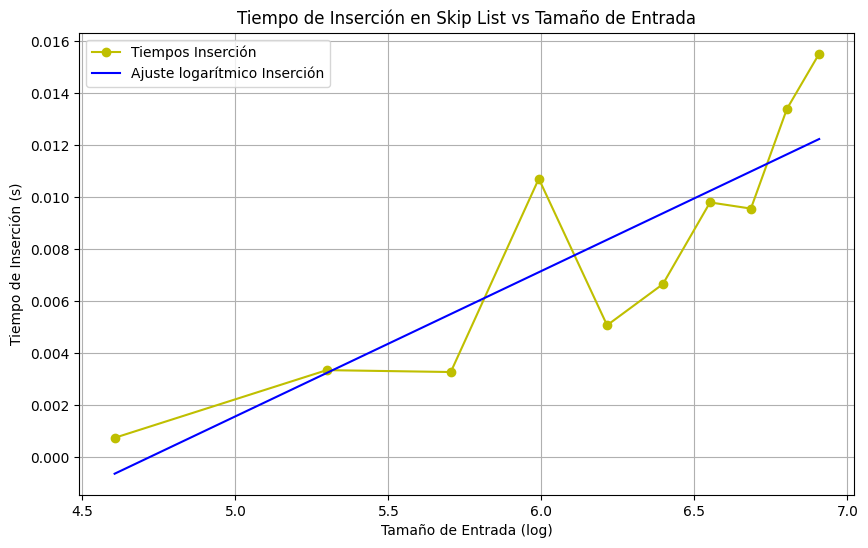

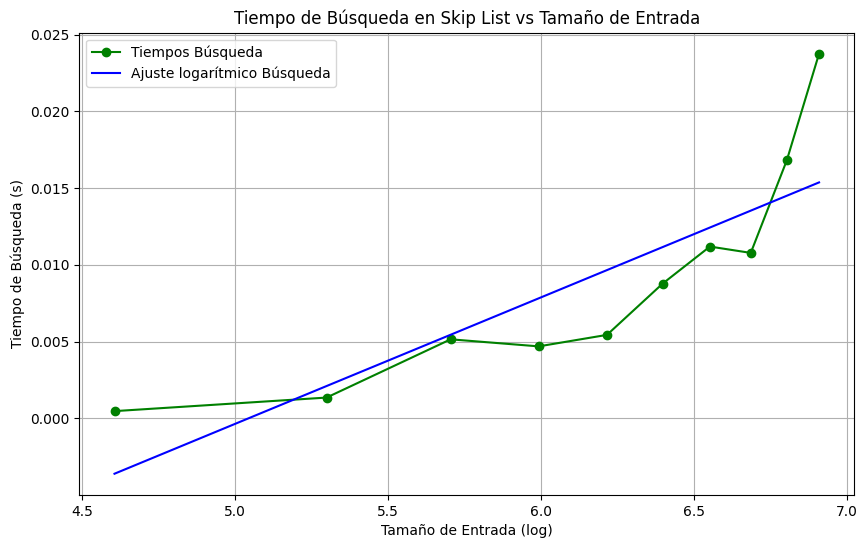

In [54]:
#graficar
log_input_sizes = np.log(input_sizes)
coef_insert = np.polyfit(log_input_sizes, insertion_times, 1)
coef_search = np.polyfit(log_input_sizes, search_times, 1)

# Polinomios para las líneas de ajuste
poly_insert = np.poly1d(coef_insert)
poly_search = np.poly1d(coef_search)

# Generar puntos para las líneas de ajuste
x_line = np.linspace(min(log_input_sizes), max(log_input_sizes), 100)
y_line_insert = poly_insert(x_line)
y_line_search = poly_search(x_line)

# Gráfico para Inserción
plt.figure(figsize=(10, 6))
plt.plot(log_input_sizes, insertion_times, 'yo-', label='Tiempos Inserción')  # Puntos de datos reales
plt.plot(x_line, y_line_insert, 'b-', label='Ajuste logarítmico Inserción')  # Línea de ajuste
plt.title('Tiempo de Inserción en Skip List vs Tamaño de Entrada')
plt.xlabel('Tamaño de Entrada (log)')
plt.ylabel('Tiempo de Inserción (s)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico para Búsqueda
plt.figure(figsize=(10, 6))
plt.plot(log_input_sizes, search_times, 'go-', label='Tiempos Búsqueda')  # Puntos de datos reales
plt.plot(x_line, y_line_search, 'b-', label='Ajuste logarítmico Búsqueda')  # Línea de ajuste
plt.title('Tiempo de Búsqueda en Skip List vs Tamaño de Entrada')
plt.xlabel('Tamaño de Entrada (log)')
plt.ylabel('Tiempo de Búsqueda (s)')
plt.legend()
plt.grid(True)
plt.show()

## Sección 3: Conclusiones y principales hallazgos

Autoexplicativo.

# Apéndice (no es parte del trabajo)

* **¿Como incluir videos de youtube?**

Ver el código de la siguiente celda.

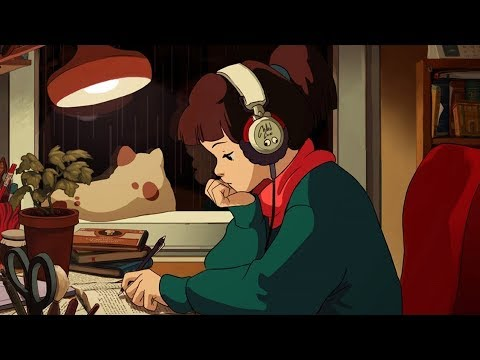

In [ ]:
#@title
from IPython.display import YouTubeVideo
YouTubeVideo('5qap5aO4i9A')

* **¿Como incluir imágenes?**

La forma sencilla es a través del enlace web utilizando la etiqueta *HTML* `img`. El problema es que la imagen puede ser bajada y el link quedaría roto.

La segunda forma es a través de un cuadro de Texto, presionar el boton insertar imagen. Esto incluirá en el *notebook* el binario completo de la imagen, por lo que recomiendo destinar un cuadro de texto especial para cada imagen (este es el método que utilizo habitualmente y lo puede ver en los apuntes).

La tercera forma es a través de *Google Drive* como podemos ver en [este enlace](https://towardsdatascience.com/the-2-step-guide-to-upload-images-in-google-colab-b51348e882e4) (en ingles).

**OJO** salvo en el primer método no hay como redimensionar la imagen, por lo que debe redimensionarle antes con un programa de fotografía.

* **¿Como dar formato al texto?**

Puede hacerlo a través de la barra de herramientas de cada cuadro de texto, pero es bastante limitada.

Puede además utilizar el lenguaje de marcas propio de colab, como se explica en [este notebook](https://colab.research.google.com/notebooks/markdown_guide.ipynb) (en inglés).

Además se admiten las etiquedas de formateo de texto en *HTML*, como por ejemplo `font`: <font color="red">este texto ha sido cambiado a color rojo con la etiqueta `font`.</font>

* **¿Como incluir fórmulas matemáticas?**

Colab utiliza *Latex* para dibujar sus formulas matemáticas. *Latex* es un lenguaje de marcado para generar documentos (similar a como *HTML* genera páginas web). En [este notebook](https://colab.research.google.com/notebooks/markdown_guide.ipynb) (en inglés) explican también como incluir formulas *Latex* en colab.

Adicionalmente existe un editor online de formulas que permite dibujar de manera sencilla la ecuación y te entrega el código latex, se puede encontrar [aquí](https://equationeditor.atomurl.net/).



* **¿Como realizar gráficas en colab?**

En [este enlace](https://colab.research.google.com/notebooks/charts.ipynb) (en inglés), encontrarán un tutorial y varios ejemplos.